In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')
print(df.head())

    age  physical_score  test_result
0  33.0            40.7            1
1  50.0            37.2            1
2  52.0            24.7            0
3  56.0            31.0            0
4  35.0            42.9            1


In [3]:
# decide the x and y
x = df.drop(['test_result'], axis=1)
y = df['test_result']

In [4]:
# split the data into train and test datasets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

#### Decision Tree model

In [5]:
from sklearn.tree import DecisionTreeClassifier

# create the model 
model = DecisionTreeClassifier(criterion="entropy")

# train the model
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### tree visualization

[Text(110.6102481617647, 212.91, 'X[1] <= 30.65\nentropy = 0.972\nsamples = 4000\nvalue = [1607, 2393]'),
 Text(11.541176470588235, 203.85, 'X[1] <= 27.95\nentropy = 0.163\nsamples = 1339\nvalue = [1307, 32]'),
 Text(2.541176470588235, 194.79, 'X[1] <= 24.25\nentropy = 0.019\nsamples = 1117\nvalue = [1115, 2]'),
 Text(1.6941176470588235, 185.73, 'entropy = 0.0\nsamples = 771\nvalue = [771, 0]'),
 Text(3.388235294117647, 185.73, 'X[1] <= 24.35\nentropy = 0.051\nsamples = 346\nvalue = [344, 2]'),
 Text(1.6941176470588235, 176.67, 'X[0] <= 62.5\nentropy = 0.469\nsamples = 10\nvalue = [9, 1]'),
 Text(0.8470588235294118, 167.60999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(2.541176470588235, 167.60999999999999, 'X[0] <= 66.0\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(1.6941176470588235, 158.55, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(3.388235294117647, 158.55, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(5.08235294117647, 176.67, 'X[0] <

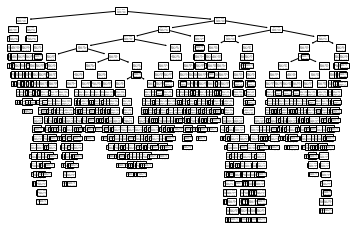

In [6]:
from sklearn.tree import plot_tree

plot_tree(model)

In [7]:
import graphviz 
from sklearn import tree

file = open("tree.png", "w")
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=x_test.columns, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render('hearting_test',view=True)
# graph
file.close()

#### Evaluation

In [8]:
# predict the values
y_prediction = model.predict(x_test)
# print(y_prediction)

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[335  58]
 [ 61 546]]


In [10]:
# accuracy
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test, y_prediction) * 100 :0.2f} %")

accuracy = 88.10 %


In [11]:
# classsification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       393
           1       0.90      0.90      0.90       607

    accuracy                           0.88      1000
   macro avg       0.87      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [12]:
# RoC score
from sklearn.metrics import roc_auc_score

print(f"roc auc score = {roc_auc_score(y_test, y_prediction)}")

roc auc score = 0.8759615344307927


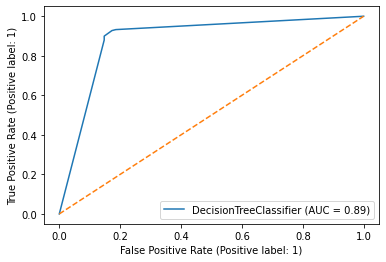

In [13]:
# AuC 
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x_test, y_test)
plt.plot([0, 1], [0, 1], linestyle="--")